In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

df <- read.csv("in-one-chart.csv")
df

      X.Name Year     Ratio
1  Sabalenka 2017 1.2166667
2  Sabalenka 2018 0.8896321
3  Sabalenka 2019 0.7142857
4  Sabalenka 2020 0.9939759
5  Sabalenka 2021 1.0562130
6  Sabalenka 2022 0.5817757
7  Sabalenka 2023 1.4175439
8  Sabalenka 2024 1.4975610
9  Sabalenka 2025 2.3529412
10   Swiatek 2017 0.0000000
11   Swiatek 2018 0.0000000
12   Swiatek 2019 1.0987654
13   Swiatek 2020 0.0000000
14   Swiatek 2021 1.0247934
15   Swiatek 2022 0.9013158
16   Swiatek 2023 1.0241935
17   Swiatek 2024 1.2190476
18   Swiatek 2025 0.6666667
19     Gauff 2017 0.0000000
20     Gauff 2018 0.0000000
21     Gauff 2019 0.5789474
22     Gauff 2020 0.3758389
23     Gauff 2021 1.0081301
24     Gauff 2022 0.8461538
25     Gauff 2023 1.1872146
26     Gauff 2024 0.5813953
27     Gauff 2025 0.9310345
28   Paolini 2017 0.0000000
29   Paolini 2018 0.2307692
30   Paolini 2019 0.2083333
31   Paolini 2020 0.2285714
32   Paolini 2021 0.3516484
33   Paolini 2022 0.3529412
34   Paolini 2023 0.5176471
35   Paolini 2024 0.

In [5]:
%%R

library(ggplot2)
library(tidyr)
library(dplyr)


Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:

%%R

install.packages('showtext', repos='http://cran.rstudio.com/')
install.packages('sysfonts', repos='http://cran.rstudio.com/')


The downloaded binary packages are in
	/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T//Rtmp9Xrohv/downloaded_packages

The downloaded binary packages are in
	/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T//Rtmp9Xrohv/downloaded_packages


trying URL 'http://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/showtext_0.9-7.tgz'
Content type 'application/x-gzip' length 465197 bytes (454 KB)
downloaded 454 KB

trying URL 'http://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/sysfonts_0.8.9.tgz'
Content type 'application/x-gzip' length 6981148 bytes (6.7 MB)
downloaded 6.7 MB



In [7]:
%%R

library(showtext)
library(sysfonts)
library(ggplot2)

Loading required package: sysfonts
Loading required package: showtextdb


****Installation and imports for the economist theme****

In [9]:
%%R

install.packages("showtext")
library(showtext)

# Load a Google Font
font_add_google("Lato", "lato")  # Replace "Lato" with any other Google font
showtext_auto()  # Enable showtext


--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  69



The downloaded binary packages are in
	/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T//Rtmp9Xrohv/downloaded_packages


trying URL 'https://lib.stat.cmu.edu/R/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/showtext_0.9-7.tgz'
Content type 'application/x-gzip' length 465197 bytes (454 KB)
downloaded 454 KB

In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <34C5A480-1AC4-30DF-83C9-30A913FC042E> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)


In [12]:
%%R

library(ggthemes)

R[write to console]: In addition: 
R[write to console]: There were 22 warnings (use warnings() to see them)
R[write to console]: 



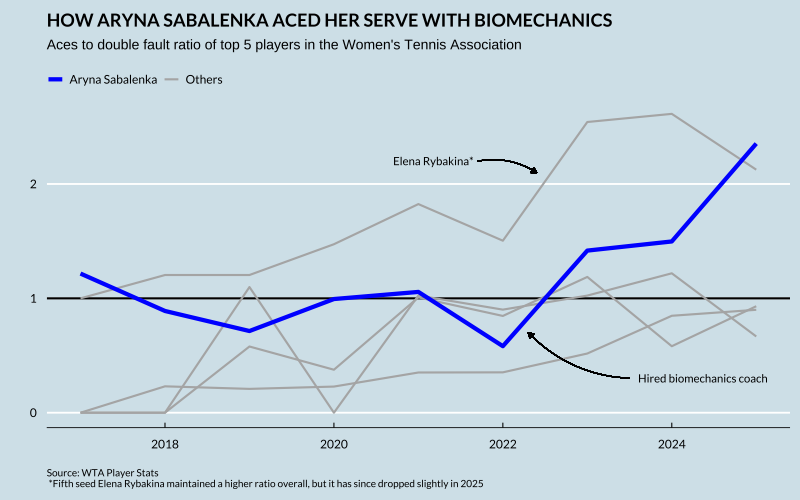

In [13]:
%%R -w 800 -h 500


ggplot(df) +
  geom_hline(yintercept = 1.0, size = 1, color = "black") + #thick black line to show when ratio crosses 1
  geom_line(aes(x = Year, y = Ratio, group = X.Name, color = "Others"), size = 1) +
  geom_line(data = subset(df, X.Name == "Sabalenka"),
            aes(x = Year, y = Ratio, color = "Aryna Sabalenka"),
            size = 2) + #custom thick line for Sabalenka
  labs(color = 'Aryna Sabalenka',
       title = 'HOW ARYNA SABALENKA ACED HER SERVE WITH BIOMECHANICS',
       subtitle = "Aces to double fault ratio of top 5 players in the Women's Tennis Association", 
       x = '', 
       y = '',
       caption = "Source: WTA Player Stats \n *Fifth seed Elena Rybakina maintained a higher ratio overall, but it has since dropped slightly in 2025") + #footnot for source and Rybakina 
  theme_economist() +  #economist theme
  theme(
    text = element_text(family = "lato"),  
    plot.title = element_text(family = "lato", size = 18, face = "bold", margin = margin(b = 10)),
    plot.subtitle = element_text(family = "Monteserrat", size = 14, hjust = 0),
    axis.text = element_text(family = "lato", size = 12),
    legend.text = element_text(family = "lato", size = 12),
    axis.title.y = element_text(margin = margin(r=10)),
    legend.justification = "left",
    legend.margin = margin(t = 20),
    plot.caption = element_text(size = 10, hjust = 0, margin = margin(t = 10))
  ) +
  scale_color_manual(
    values = c("Aryna Sabalenka" = "blue", 
               "Others" = "grey70"),
    name = NULL) + 
  geom_curve(aes(x = 2023.5, y = 0.3, xend = 2022.3, yend = 0.7),
           arrow = arrow(type = "closed", length = unit(0.2, "cm")),
           curvature = -0.2) +  #Sabalenka annotation
  annotate("text", x = 2023.6, y = 0.3, 
        label = "Hired biomechanics coach", 
        hjust = 0, size = 4, family = "lato") +  #Annotation text
  geom_curve(aes(x = 2021.7, y = 2.2, xend = 2022.4, yend = 2.1),
           arrow = arrow(type = "closed", length = unit(0.2, "cm")),
           curvature = -0.2) +  #Rybakina annotation
  annotate("text", x = 2020.7, y = 2.2, 
        label = "Elena Rybakina*", 
        hjust = 0, size = 4, family = "lato") #Annotation text